# Audit Risk Prediction 

## Business Problem
##### The increasing complexity of business operations and regulations has led to a rise in the risk of financial fraud and misreporting. Companies must conduct audit risk analysis to identify areas of potential risk and ensure compliance with regulatory requirements. However, many companies struggle with conducting effective audit risk analysis due to limited resources, lack of expertise, and inadequate data management systems. This can lead to financial losses, reputational damage, and legal penalties for non-compliance. We will develop a predictive model to predict risk factor for involved with the companies.

In this notebook we focus on the data loading, basic exploring, and data prepatation. The output from this notebook will be a cleaned data set that we can use for model fitting that will be used later in another notebook. 


## 1.0 Import and install python libraries

Here we import any Python libraries that we plan to use. Any libraries that we import must be installed on your computer. Numpy and Pandas should be installed as part of Anaconda; but if you ever find yourself in a situation where you don't have the library installed, you can use the conda command from a terminal:


For example:
conda install -c conda-forge numpy

In [145]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

## 2.0 Set Random Seed

It's *very* important that you set this! In this course we will use the random seed value of 1.

In [146]:
# set random seed to ensure that results are repeatable
np.random.seed(1)

In [147]:
import os
os.chdir("D:/BAIS/2nd Sem/DSP")

print(os.getcwd())

D:\BAIS\2nd Sem\DSP


## 3.0 Load data 

One of the most common file formats for data is csv (comma seperated value). Pandas has a function called read_csv() that will load the data into a Pandas dataframe. 
NOTE: There are other file formats we can use. For instance:
* Excel files can be loaded using read_excel(). 
* json (JavaScript Object Notation). This is a very common format for web data. 
* Parquet files are a compressed file format that is very common in big data applications.
* For larger datasets you may want to use a database. Pandas has functions to connect to a database and load data.
* For extremely large datasets, you may want to use a distributed file system such as HDFS (Hadoop Distributed File System) or S3 (Amazon Simple Storage Service).

In [148]:
# load data
audit = pd.read_csv("./data/audit_risk.csv")

## 4.0 Conduct initial exploration of the data

We have a number of input variables and one target variable. For this analysis, the target variable is price.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.
 

In [149]:
# look at the data
audit.head(3) 

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0


### Data Description: 
PARA_A : Discrepancy found in the planned-expenditure of inspection and summary report A in Rs (in crore).

PARA_B: Discrepancy found in the unplanned-expenditure of inspection and summary report B in Rs (in crore).

TOTAL: Total amount of discrepancy found in other reports Rs (in crore) i.e. sum of PARA_A and PARA_B

Sector_score: score of the organization in its respective sector

numbers: rating of the organization based on Historical discrepancy score.

Loss_score: loss value of the organization based on Amount of loss suffered by the firm last year.

Money_value: money value of the organization based on Amount of money involved in misstatements in the past audits.

History_score: historical score of the organization based on Average historical loss suffered by firm in the last 10 years.

District: type of district belong to based on Historical risk score of a district in the last 10 years.

Location ID: Unique ID of the city/province.

Risk: fraudulent or not

In [150]:
# generate a basic summary of the data
audit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [151]:
# generate a statistical summary of the numeric value in the data
audit.describe()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,...,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,...,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.0,776.000000,776.000000
mean,20.184536,2.450194,0.351289,1.351029,10.799988,0.313144,6.334008,13.218481,5.067655,0.223711,...,0.519072,0.104381,0.216753,0.053608,2.702577,17.680612,0.572680,0.5,7.168158,0.393041
std,24.319017,5.678870,0.174055,3.440447,50.083624,0.169804,30.072845,51.312829,0.264449,0.080352,...,0.290312,0.531031,0.067987,0.305835,0.858923,54.740244,0.444581,0.0,38.667494,0.488741
min,1.850000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.400000,0.400000,0.5,0.280000,0.000000
25%,2.370000,0.210000,0.200000,0.042000,0.000000,0.200000,0.000000,0.537500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.000000,1.583500,0.400000,0.5,0.316700,0.000000
50%,3.890000,0.875000,0.200000,0.175000,0.405000,0.200000,0.081000,1.370000,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,2.400000,2.214000,0.400000,0.5,0.555600,0.000000
75%,55.570000,2.480000,0.600000,1.488000,4.160000,0.400000,1.840500,7.707500,5.000000,0.200000,...,0.400000,0.000000,0.200000,0.000000,3.250000,10.663500,0.400000,0.5,3.249900,1.000000
max,59.850000,85.000000,0.600000,51.000000,1264.630000,0.600000,758.778000,1268.910000,9.000000,0.600000,...,2.400000,9.000000,0.600000,5.400000,5.200000,801.262000,5.800000,0.5,961.514400,1.000000


### jupyter-summarytools



In [152]:
audit.dropna(subset = ['Money_Value'], inplace=True)

In [153]:
# Check the missing values by summing the total na's for each variable
audit.isna().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [154]:
# create a list of catagorical variables, these will be loaded from a csv file as dtype=object.
category_var_list = list(audit.select_dtypes(include='object').columns)
category_var_list

['LOCATION_ID']

In [155]:
# explore the categorical variable values - often there are typos here that need to be fixed.
for cat in category_var_list: # generally, we want to avoid for loops and use a functional style (i.e. list comprehension)
    print(f"Category: {cat} Values: {audit[cat].unique()}")

Category: LOCATION_ID Values: ['23' '6' '7' '8' '13' '37' '24' '3' '4' '14' '5' '20' '19' '21' '22' '9'
 '11' '12' '29' '30' '38' '31' '2' '32' '16' '33' '15' '36' '34' '18' '25'
 '39' '27' '35' '40' '41' '42' '1' '28' 'LOHARU' 'NUH' 'SAFIDON' '43' '44'
 '17']


### Summary the findings from our initial evaluation of the data

* We have 1 categorical variables
* We have 1 variables that have missing values
* We will be deleting the location ID category since it won't play as much important role for risk analysis

## 5.0 Process the data

* Conduct any data prepartion that should be done *BEFORE* the data split.
* Split the data.
* Conduct any data preparation that should be done *AFTER* the data split.

### 5.1  Conduct any data prepartion that should be done *BEFORE* the data split

Tasks at this stage include:
1. Drop any columns/features that will not be part of the model.
2. Decide if you with to exclude any observations (rows) due to missing na's.
   1. is drop the row the best option? or shoud we impute?
3. Conduct proper encoding of categorical variables
    1. You can transform them using dummy variable encoding, one-hot-encoding, or label encoding. 

#### Drop any columns/variables we will not be using

##### Deleting TOTAL, which is just the total of PARA_A and PARA_B and LOCATION_ID as these are not significant for prediction process
#### Dropping Audit_risk since it is the same value we have to predict and keeping it in our dataset would lead our model to oversample

In [156]:
audit.drop(['TOTAL', 'LOCATION_ID','Inherent_Risk','Audit_Risk'], axis=1, inplace = True)

In [157]:
audit.info()

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 775
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    775 non-null    float64
 1   PARA_A          775 non-null    float64
 2   Score_A         775 non-null    float64
 3   Risk_A          775 non-null    float64
 4   PARA_B          775 non-null    float64
 5   Score_B         775 non-null    float64
 6   Risk_B          775 non-null    float64
 7   numbers         775 non-null    float64
 8   Score_B.1       775 non-null    float64
 9   Risk_C          775 non-null    float64
 10  Money_Value     775 non-null    float64
 11  Score_MV        775 non-null    float64
 12  Risk_D          775 non-null    float64
 13  District_Loss   775 non-null    int64  
 14  PROB            775 non-null    float64
 15  RiSk_E          775 non-null    float64
 16  History         775 non-null    int64  
 17  Prob            775 non-null    float64


#### checking for data imbalance

<Axes: xlabel='Risk', ylabel='count'>

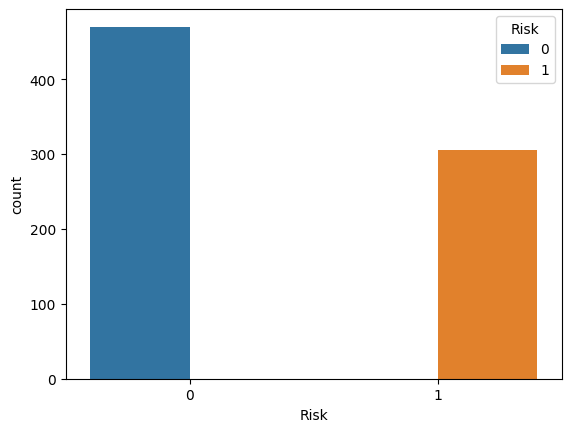

In [158]:
sns.countplot(x="Risk", hue="Risk", data=audit)


In [159]:
audit.Risk.value_counts()


Risk
0    470
1    305
Name: count, dtype: int64

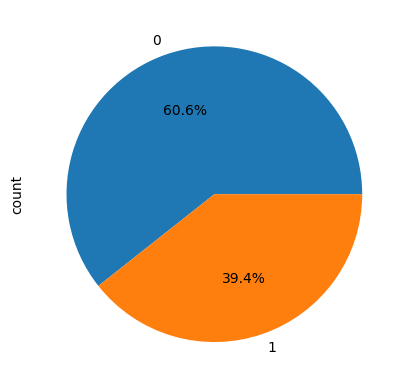

In [160]:
audit['Risk'].value_counts().plot.pie(autopct = '%1.1f%%');

That is some amount of class imbalance in the data. We will use SMOTE-ENN method



In [161]:
import imblearn


In [162]:
audit.Risk.value_counts()


Risk
0    470
1    305
Name: count, dtype: int64

In [163]:
X = audit.drop(columns = 'Risk')
y = audit.Risk

In [164]:
from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy='minority')

X, y = oversample.fit_resample(X, y)

print(Counter(y))

Counter({1: 470, 0: 470})


In [165]:
y.value_counts()


Risk
1    470
0    470
Name: count, dtype: int64

In [166]:
audit.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

C:\Users\priya\.conda\envs\tf\Lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
C:\Users\priya\.conda\envs\tf\Lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,CONTROL_RISK,Detection_Risk,Risk
Sector_score,1.0,-0.22,-0.42,-0.22,-0.13,-0.22,-0.13,-0.15,-0.17,-0.17,-0.12,-0.32,-0.12,-0.11,-0.087,-0.13,-0.11,-0.14,-0.1,-0.34,-0.15,nan,-0.39
PARA_A,-0.22,1.0,0.5,1.0,0.16,0.36,0.16,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.17,0.1,0.43,0.15,nan,0.38
Score_A,-0.42,0.5,1.0,0.5,0.25,0.57,0.25,0.24,0.27,0.27,0.21,0.48,0.2,0.088,0.094,0.1,0.18,0.27,0.15,0.72,0.17,nan,0.62
Risk_A,-0.22,1.0,0.5,1.0,0.17,0.36,0.17,0.14,0.14,0.14,0.45,0.29,0.45,0.13,0.044,0.12,0.12,0.18,0.11,0.43,0.15,nan,0.38
PARA_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.079,0.2,0.32,0.2,0.4,0.19,nan,0.26
Score_B,-0.22,0.36,0.57,0.36,0.35,1.0,0.35,0.28,0.31,0.3,0.21,0.57,0.2,-0.005,0.092,0.015,0.2,0.31,0.17,0.9,0.13,nan,0.64
Risk_B,-0.13,0.16,0.25,0.17,1.0,0.35,1.0,0.21,0.23,0.22,0.13,0.31,0.12,0.083,0.043,0.08,0.2,0.32,0.2,0.4,0.19,nan,0.26
numbers,-0.15,0.13,0.24,0.14,0.21,0.28,0.21,1.0,0.91,0.96,0.19,0.45,0.19,0.12,0.036,0.14,0.2,0.21,0.2,0.5,0.23,nan,0.31
Score_B.1,-0.17,0.14,0.27,0.14,0.23,0.31,0.23,0.91,1.0,0.99,0.22,0.51,0.22,0.15,0.037,0.16,0.23,0.25,0.22,0.57,0.26,nan,0.35
Risk_C,-0.17,0.14,0.27,0.14,0.22,0.3,0.22,0.96,0.99,1.0,0.22,0.49,0.22,0.15,0.036,0.15,0.22,0.24,0.22,0.55,0.25,nan,0.34


### As we have seen there is no correlation of Detection_Risk so it will be deleted before model building process as it is not contributing well enough for prediction process.

In [167]:
X=X.drop(['Detection_Risk'],axis=1)


In [168]:
X.head()

,Sector_score,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,numbers,Score_B.1,Risk_C,...,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,CONTROL_RISK
0,3.89,4.18,0.6,2.508,2.50,0.2,0.500,5.0,0.2,1.0,...,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,0.4
1,3.89,0.00,0.2,0.000,4.83,0.2,0.966,5.0,0.2,1.0,...,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,0.4
2,3.89,0.51,0.2,0.102,0.23,0.2,0.046,5.0,0.2,1.0,...,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.4
3,3.89,0.00,0.2,0.000,10.80,0.6,6.480,6.0,0.6,3.6,...,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,0.4
4,3.89,0.00,0.2,0.000,0.08,0.2,0.016,5.0,0.2,1.0,...,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,0.4


In [169]:
X.columns


Index(['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'CONTROL_RISK'],
      dtype='object')

In [170]:
# explore the dataframe columns to verify encoding and dropped columns
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   940 non-null    float64
 1   PARA_A         940 non-null    float64
 2   Score_A        940 non-null    float64
 3   Risk_A         940 non-null    float64
 4   PARA_B         940 non-null    float64
 5   Score_B        940 non-null    float64
 6   Risk_B         940 non-null    float64
 7   numbers        940 non-null    float64
 8   Score_B.1      940 non-null    float64
 9   Risk_C         940 non-null    float64
 10  Money_Value    940 non-null    float64
 11  Score_MV       940 non-null    float64
 12  Risk_D         940 non-null    float64
 13  District_Loss  940 non-null    int64  
 14  PROB           940 non-null    float64
 15  RiSk_E         940 non-null    float64
 16  History        940 non-null    int64  
 17  Prob           940 non-null    float64
 18  Risk_F    

### 5.2 Split data (train/test)

In [171]:
# split the data into validation and training set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Risk'
predictors = list(X.columns)


In [172]:
predictors


['Sector_score',
 'PARA_A',
 'Score_A',
 'Risk_A',
 'PARA_B',
 'Score_B',
 'Risk_B',
 'numbers',
 'Score_B.1',
 'Risk_C',
 'Money_Value',
 'Score_MV',
 'Risk_D',
 'District_Loss',
 'PROB',
 'RiSk_E',
 'History',
 'Prob',
 'Risk_F',
 'Score',
 'CONTROL_RISK']

### 5.3  Conducting data prepartion that should be done *AFTER* the data split

We will look at the following:
1) imput any missing numeric values using the mean of the variable/column
2) remove differences of scale by standardizing the numerica variables

#### Impute missing values

In [173]:
numeric_cols_with_nas = list(X_train.isna().sum()[X_train.isna().sum() > 0].index)
numeric_cols_with_nas


[]

#### No missing value any more in the data

#### Standardize numeric values

Now, let's create a common scale between the numeric columns by standardizing each numeric column

In [174]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = ['Sector_score', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B', 'Score_B',
       'Risk_B', 'numbers', 'Score_B.1', 'Risk_C', 'Money_Value', 'Score_MV',
       'Risk_D', 'District_Loss', 'PROB', 'RiSk_E', 'History', 'Prob',
       'Risk_F', 'Score', 'CONTROL_RISK',
       ]                
               
# Transform the predictors of training and validation sets
X_train[cols_to_stdize] = scaler.fit_transform(X_train[cols_to_stdize]) # train_predictors is not a numpy array


X_test[cols_to_stdize] = scaler.transform(X_test[cols_to_stdize]) # validation_target is now a series object


## 6.0 Save the data

In [175]:
#X_train = train_df[predictors]
#y_train = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
#X_test = test_df[predictors]
#y_test = test_df[target] # validation_target is now a series object


#train_df.to_csv('./audit1_train_df1.csv', index=False)
X_train.to_csv('./audit1_train_X1.csv', index=False)
y_train.to_csv('./audit1_train_y1.csv', index=False)
#test_df.to_csv('./audit1_test_df1.csv', index=False)
X_test.to_csv('./audit1_test_X1.csv', index=False)
y_test.to_csv('./audit1_test_y1.csv', index=False)